# Лабораторная работа №3
### Оценивание параметров нелинейного объекта методом наименьших квадратов

Уравнение исследуемого в лабораторной работе объекта имеет вид:
    \begin{equation}y=f(t,A,B,C,D,E)=A\exp(Bt)\cos(Ct+D)+E+\eta\end{equation}
Уравнение модели объекта:
    \begin{equation}\tilde{y}=\tilde{A}\exp(\tilde{B}t)\cos(\tilde{C}t+\tilde{D})+\tilde{E}\end{equation}
Видно, что объект нелинеен по параметрам $A,B,C,D,E$. 
Данные параметры подлежат оцениванию, $t$ — единственная предикторная переменная, а $\eta$ — случайная ошибка, удовлетворяющая
обычным предположениям: $ E(\eta) = 0, D(\eta)= \sigma^2 $.

Найти оценки параметров $A,B,C,D,E$ предлагается с помощью применения МНК к линеаризованному объекту.

Для линеаризации объекта нужны частные производные от уравнения модели объекта по каждому из параметров. 

Вычислите эти частные производные и запишите уравнение модели линеаризованного объекта:

$$\frac{\partial y}{\partial A} = ... $$
$$\frac{\partial y}{\partial B} = ... $$ 
$$\frac{\partial y}{\partial C} = ... $$
$$\frac{\partial y}{\partial D} = ... $$
$$\frac{\partial y}{\partial E} = ... $$

$$y= ... $$

Теперь перейдем к обработке измерений, полученных c объекта.
Подключим необходимые для работы библиотеки и считаем данные из файла с измерениями.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [210]:
#Если необходимо перевести время в другую единицу измерения
#data['t']=data['t']/1000 # перевод колонки t в мсек
T = [0]*100
U = [0]*100
import openpyxl
wb = openpyxl.load_workbook(filename = r"Tankov.xlsx")
sheet = wb['Tankov']
for i in range(100):
    T[i] = sheet.cell(row=i+2, column=1).value
    U[i] = sheet.cell(row=i+2, column=2).value
print(type(T[10]))

<class 'int'>


Построим зависимость измеpений от времени:

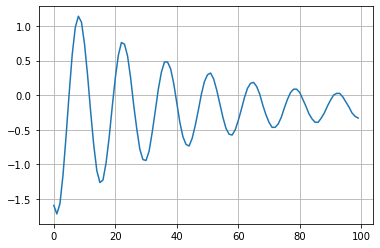

In [211]:
plt.plot(T, U)
plt.grid(True)

Исходя из графика и уравнения объекта, подберите начальное приближение:
$A_{0},B_{0},C_{0},D_{0},E_{0}$

ПРИМЕЧАНИЕ: если в процессе оценивания параметров МНК разойдется, то возможно стоит выбрать более точное начальное приближение.

In [222]:
#Ваш код здесь
A_0 = 1.4117
B_0 = 0.028
C_0= 2 * 3.14 / 15
D_0 = 3.14 / 2
E_0 = -0.1


Определите функции, возвращающие значения частных производных:

In [223]:
#Ваш код здесь
def dFdA(t, A0, B0, C0, D0, E0):
    y_A = np.exp(-B0*t)*np.cos(C0*t+D0)
    return y_A

def dFdB(t, A0, B0, C0, D0, E0):
    y_B = t*A0*np.exp(-B0*t)*np.cos(C0*t+D0)
    return y_B

def dFdC(t, A0, B0, C0, D0, E0):
    y_C = -A0*t*np.exp(-B0*t)*np.sin(C0*t+D0)
    return y_C

def dFdD(t, A0, B0, C0, D0, E0):
    y_D = -A0*np.exp(-B0*t)*np.sin(C0*t+D0)
    return y_D

def dFdE(t, A0, B0, C0, D0, E0):
    return 1  

def Y(t, A0, B0, C0, D0, E0):
    return (A0*np.exp(-B0*t)*np.cos(C0*t+D0)+E0)


Реализуйте МНК для линеаризованного объекта и найдите оценку параметров: $\tilde{A},\tilde{B},\tilde{C},\tilde{D},\tilde{E}$

In [224]:
#Ваш код здесь
c_j1 = np.array([A_0, B_0, C_0, D_0, E_0])
c_j = np.array([0]*5)
c_j1.shape = (5, 1)
c_j.shape = (5, 1)
e = np.array(range(100), dtype = np.float)
e.shape = (100, 1)
j = 0

while (np.abs(c_j1[0]-c_j[0])>0.00001) and (np.abs(c_j1[1]-c_j[1])>0.00001) and (np.abs(c_j1[2]-c_j[2])>0.00001) and (np.abs(c_j1[3]-c_j[3])>0.00001) and (np.abs(c_j1[4]-c_j[4])>0.00001):
    Ksi = np.zeros((100, 5))
    c_j = c_j1
    for i in range(100):
        e[i] = U[i] - Y(T[i], c_j[0], c_j[1], c_j[2], c_j[3], c_j[4])
        Ksi[i][0]= dFdA(T[i], c_j[0], c_j[1], c_j[2], c_j[3], c_j[4])
        Ksi[i][1]= dFdB(T[i], c_j[0], c_j[1], c_j[2], c_j[3], c_j[4])
        Ksi[i][2]= dFdC(T[i], c_j[0], c_j[1], c_j[2], c_j[3], c_j[4])
        Ksi[i][3]= dFdD(T[i], c_j[0], c_j[1], c_j[2], c_j[3], c_j[4])
        Ksi[i][4]= dFdE(T[i], c_j[0], c_j[1], c_j[2], c_j[3], c_j[4])
        
    R=np.eye(100)
    Ksi = np.asmatrix(Ksi)
    e = np.asmatrix(e)
    c_j1 = c_j + (Ksi.getT() * R * Ksi).getI() * Ksi.getT() * R * e
    print("итерация ", j)
    print("A = ", c_j1[0])
    print("B = ", c_j1[1])
    print("C = ", c_j1[2])
    print("D = ", c_j1[3])
    print("E = ", c_j1[4])
    j = j + 1

print("Количество итераций = ", j)
print("Сумма квадратов ошибок = ", S) 
print("Начальный параметр A = ", A_0, "       Новый параметр = ", c_j1[0])
print("Начальный параметр B = ", B_0, "       Новый параметр = ", c_j1[1])
print("Начальный параметр C = ", C_0, "       Новый параметр = ", c_j1[2])
print("Начальный параметр D = ", D_0, "       Новый параметр = ", c_j1[3])
print("Начальный параметр E = ", E_0, "       Новый параметр = ", c_j1[4])

итерация  0
A =  [[0.81474349]]
B =  [[8.57068979e-05]]
C =  [[0.41454837]]
D =  [[2.72979752]]
E =  [[-0.167395]]
итерация  1
A =  [[1.26606996]]
B =  [[-0.02292605]]
C =  [[0.41218544]]
D =  [[3.23012949]]
E =  [[-0.18639534]]
итерация  2
A =  [[0.47509692]]
B =  [[-0.02744436]]
C =  [[0.41195993]]
D =  [[3.27867769]]
E =  [[-0.19103354]]
итерация  3
A =  [[0.3466243]]
B =  [[-0.03605775]]
C =  [[0.41119449]]
D =  [[3.3955012]]
E =  [[-0.18988724]]
итерация  4
A =  [[0.171686]]
B =  [[-0.04174317]]
C =  [[0.41020591]]
D =  [[3.51239737]]
E =  [[-0.18771242]]
итерация  5
A =  [[0.10148277]]
B =  [[-0.04843857]]
C =  [[0.40868163]]
D =  [[3.68211468]]
E =  [[-0.18687509]]
итерация  6
A =  [[0.05207636]]
B =  [[-0.05418296]]
C =  [[0.40694877]]
D =  [[3.86714186]]
E =  [[-0.18634165]]
итерация  7
A =  [[0.02853239]]
B =  [[-0.06026956]]
C =  [[0.40469627]]
D =  [[4.1028671]]
E =  [[-0.18630096]]
итерация  8
A =  [[0.01481315]]
B =  [[-0.0660009]]
C =  [[0.40210794]]
D =  [[4.36995462]]


Постройте графики для исходных измерений и полученной модели объекта:

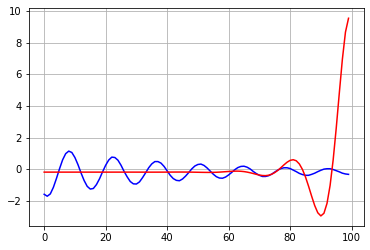

In [225]:
#Ваш код здесь
plt.plot(T, U, color='b')
plt.grid(True)

#График для полученной модели
y = numpy.array(range(100), dtype = np.double)
y.shape = (100,1) 
i=0
for i in range(100):
    y[i]=c_j1[0]*np.exp(-c_j1[1]*i)*np.cos(c_j1[2]*i+c_j1[3])+c_j1[4]
    i=i+1
plt.plot(T, y, color='r')
plt.grid(True)

Постройте график остатков и сделайте выводы о применимости линеаризации для оценки параметров нелинейных объектов:

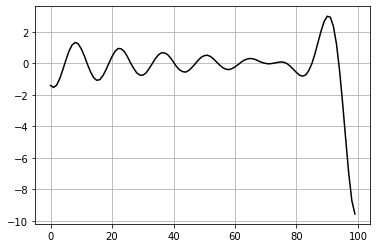

In [226]:
#Ваш код здесь
#График для исходных измерений
plt.plot(T, e, color='k')
plt.grid(True)

**После выполнения лабораторной работы необходимо написать краткий отчет, который должен включать в себя:**
    - титульный лист
    - описание моделируемого объекта
    - математические выкладки о применении МНК для оценки параметров моделируемого объекта
    - выводы о применимости линеаризации для оценки параметров нелинейных объектов